In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/NLP Project")
!ls

AuthorIdentify.ipynb  NaiveBayes.ipynb	test.csv   Untitled
mlp_model_weights.h5  NLPproject.ipynb	train.csv


In [0]:
import numpy as np 
import pandas as pd 
from IPython.display import display

import re
from collections import Counter
from time import time
from nltk.corpus import stopwords
from sklearn.metrics import log_loss

In [0]:
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')
# sns.set_context('notebook')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train = pd.read_csv('train.csv',skiprows=1, names=['id', 'text', 'author']).set_index('id')

In [0]:
print(train.index)

Index(['id26305', 'id17569', 'id11008', 'id27763', 'id12958', 'id22965',
       'id09674', 'id13515', 'id19322', 'id00912',
       ...
       'id26790', 'id14263', 'id14420', 'id03325', 'id07567', 'id17718',
       'id08973', 'id05267', 'id17513', 'id00393'],
      dtype='object', name='id', length=19579)


In [0]:
train.index = [id[2:] for id in train.index]

In [0]:
print(train.index)

Index(['26305', '17569', '11008', '27763', '12958', '22965', '09674', '13515',
       '19322', '00912',
       ...
       '26790', '14263', '14420', '03325', '07567', '17718', '08973', '05267',
       '17513', '00393'],
      dtype='object', length=19579)


In [0]:
print(train['text'][1])
print(train.head(10))

It never once occurred to me that the fumbling might be a mere mistake.
                                                      text author
id                                                               
id26305  This process, however, afforded me no means of...    EAP
id17569  It never once occurred to me that the fumbling...    HPL
id11008  In his left hand was a gold snuff box, from wh...    EAP
id27763  How lovely is spring As we looked from Windsor...    MWS
id12958  Finding nothing else, not even gold, the Super...    HPL
id22965  A youth passed in solitude, my best years spen...    MWS
id09674  The astronomer, perhaps, at this point, took r...    EAP
id13515        The surcingle hung in ribands from my body.    EAP
id19322  I knew that you could not say to yourself 'ste...    EAP
id00912  I confess that neither the structure of langua...    MWS


In [0]:
print('Training Dataset:')
print(train.info())
# print()
print(train.shape)

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 19579 entries, id26305 to id00393
Data columns (total 2 columns):
text      19579 non-null object
author    19579 non-null object
dtypes: object(2)
memory usage: 1.1+ MB
None
(19579, 2)

Testing Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 8392 entries, id02310 to id04282
Data columns (total 1 columns):
text    8392 non-null object
dtypes: object(1)
memory usage: 131.1+ KB
None
(8392, 1)


In [0]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [0]:
a = Counter(train['author'])
print(a)


Counter({'EAP': 7900, 'MWS': 6044, 'HPL': 5635})


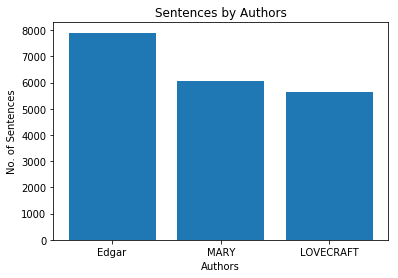

In [0]:
objects = ('Edgar','MARY','LOVECRAFT')
x_pos = np.arange(len(objects))
performance = [a['EAP'],a['MWS'],a['HPL']]
plt.bar(x_pos, performance, align='center', alpha=1)
plt.xticks(x_pos, objects)
plt.ylabel('No. of Sentences')
plt.xlabel('Authors')
plt.title('Sentences by Authors')
plt.show()

In [0]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [0]:
import string
punctuations = string.punctuation

def Preprocessing_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-'] 
        tokens = [tok for tok in tokens if tok not in stopwords]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)


In [0]:
eap_text = []
for text in train[train['author'] == 'EAP']['text']:
    eap_text.append(text)
hpl_text = []
for text in train[train['author'] == 'HPL']['text']:
    hpl_text.append(text)
mws_text = []
for text in train[train['author'] == 'MWS']['text']:
    mws_text.append(text)

In [0]:
eap_clean =  Preprocessing_text(eap_text)
print(eap_clean[:5])
mws_clean = Preprocessing_text(mws_text)
hpl_clean = Preprocessing_text(hpl_text)

0    process , however , afford mean ascertain dime...
1    left hand gold snuff box , , caper hill , cut ...
2    astronomer , perhaps , point , take refuge sug...
3                         surcingle hang riband body .
4    know could say ' stereotomy ' without bring th...
dtype: object


In [0]:
print(len(eap_clean))
# eap_clean = ' '.join(eap_clean).split()
# print(len(eap_clean))

7900


In [0]:
def RemS(wordlist):
  temp = []
  for word in wordlist:
    if word != '\'s':
      temp.append(word)
  return temp

In [0]:
eap_clean = RemS(eap_clean)
mws_clean = RemS(mws_clean)
hpl_clean = RemS(hpl_clean)

In [0]:
print('training data shape before clean : ', train['text'].shape)
train_cleaned = Preprocessing_text(train['text'], logging=True)
print('training data shape after clean : ', train_cleaned.shape)

training data shape before clean :  (19579,)
Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.
training data shape after clean :  (19579,)


In [0]:
train_vec = []
for doc in nlp.pipe(train_cleaned, batch_size=500):
    if doc.has_vector:
        train_vec.append(doc.vector)
    else:
        train_vec.append(np.zeros((128,), dtype="float32"))
        
train_vec = np.array(train_vec)

In [0]:
# train_vec =np.array(train_vec)
# train_vec.shape 
train_vec = np.reshape(train_vec,(len(train_vec),128,1)) # for LSTM
train_vec.shape

(19579, 128, 1)

In [0]:
from sklearn.preprocessing import label_binarize

y_train_ohe = label_binarize(train['author'], classes=['EAP', 'HPL', 'MWS'])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_train_ohe[:5])

y_train_ohe shape: (19579, 3)
y_train_ohe samples:
[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)

In [0]:
print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (15663, 128, 1)
X_test size: (3916, 128, 1)
y_train size: (15663, 3)
y_test size: (3916, 3)


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Flatten

In [0]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(128,1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

# estimator = model.fit(X_train, y_train,validation_split=0.2,epochs=50, batch_size=128, verbose=1)
estimator = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=50, batch_size=128, verbose=1)

Train on 15663 samples, validate on 3916 samples
Epoch 1/50
15663/15663 [==============================] - 26s 2ms/step - loss: 1.0165 - acc: 0.4945 - val_loss: 0.9805 - val_acc: 0.5345
Epoch 2/50
15663/15663 [==============================] - 26s 2ms/step - loss: 0.9768 - acc: 0.5367 - val_loss: 0.9675 - val_acc: 0.5470
Epoch 3/50
15663/15663 [==============================] - 25s 2ms/step - loss: 0.9645 - acc: 0.5435 - val_loss: 0.9612 - val_acc: 0.5426
Epoch 4/50
15663/15663 [==============================] - 26s 2ms/step - loss: 0.9568 - acc: 0.5452 - val_loss: 0.9511 - val_acc: 0.5557
Epoch 5/50
15663/15663 [==============================] - 26s 2ms/step - loss: 0.9547 - acc: 0.5496 - val_loss: 0.9449 - val_acc: 0.5595
Epoch 6/50
15663/15663 [==============================] - 25s 2ms/step - loss: 0.9457 - acc: 0.5558 - val_loss: 0.9387 - val_acc: 0.5644
Epoch 7/50
15663/15663 [==============================] - 25s 2ms/step - loss: 0.9417 - acc: 0.5576 - val_loss: 0.9370 - val_acc:

In [0]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

Training accuracy: 60.87% / Validation accuracy: 57.48%


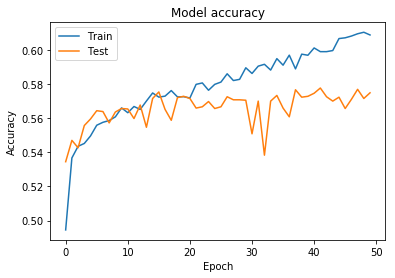

In [0]:
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Multi Layer Perceptron

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vec_m, y_train_ohe, test_size=0.2, random_state=21)

In [0]:
print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (15664, 128)
X_test size: (3916, 128)
y_train size: (15664, 3)
y_test size: (3916, 3)


In [0]:

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=128))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='sgd',metrics = ['accuracy'])
model.save_weights('mlp_model_weights.h5')
estimator = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=200, batch_size=128, verbose=1)
# estimator = model.fit(train_vec, y_train_ohe,validation_split=0.3,epochs=100, batch_size=128, verbose=1)

Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - 1s 37us/step - loss: 1.0892 - acc: 0.4023 - val_loss: 1.0294 - val_acc: 0.4678
Epoch 2/200
15663/15663 [==============================] - 0s 24us/step - loss: 1.0439 - acc: 0.4527 - val_loss: 1.0070 - val_acc: 0.5028
Epoch 3/200
15663/15663 [==============================] - 0s 25us/step - loss: 1.0260 - acc: 0.4769 - val_loss: 0.9954 - val_acc: 0.5163
Epoch 4/200
15663/15663 [==============================] - 0s 24us/step - loss: 1.0139 - acc: 0.4919 - val_loss: 0.9870 - val_acc: 0.5189
Epoch 5/200
15663/15663 [==============================] - 0s 25us/step - loss: 1.0076 - acc: 0.4954 - val_loss: 0.9788 - val_acc: 0.5281
Epoch 6/200
15663/15663 [==============================] - 0s 25us/step - loss: 0.9991 - acc: 0.5024 - val_loss: 0.9718 - val_acc: 0.5281
Epoch 7/200
15663/15663 [==============================] - 0s 25us/step - loss: 0.9902 - acc: 0.5102 - val_loss: 0.9678 - v

In [0]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

Training accuracy: 68.93% / Validation accuracy: 58.81%


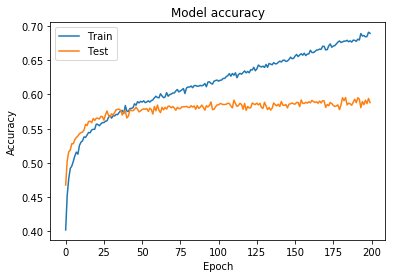

In [0]:
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:
predicted_prob = model.predict(X_test)
print(predicted_prob.shape)

(3916, 3)
